In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import the datset
cocacola = pd.read_csv("C:/Users/archa/Documents/Sem3 files/CocaCola_Sales_Rawdata.csv")

In [3]:
cocacola.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [4]:
# adding seasonal components to the dataset
quarter = ["Q1", "Q2", "Q3", "Q4"]

In [5]:
#encoding categorical data for quarters
cocacola["Quarter"][0]

'Q1_86'

In [6]:
p = cocacola["Quarter"][0]
p[0:2]
cocacola["quarter"] = 0

In [7]:
for i in range(42):
    p=cocacola["Quarter"][i]
    cocacola["quarter"][i]=p[0:2]

C:\Users\archa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\archa\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [8]:
cocacola

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1
5,Q2_87,2104.411995,Q2
6,Q3_87,2014.362999,Q3
7,Q4_87,1991.746998,Q4
8,Q1_88,1869.049999,Q1
9,Q2_88,2313.631996,Q2


In [9]:
quarter_dummies = pd.DataFrame(pd.get_dummies(cocacola["quarter"]))
df = pd.concat([cocacola, quarter_dummies], axis=1)

In [10]:
df.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0


In [11]:
#adding time tred variable
df["t"]= np.arange(1,43)

In [12]:
df["t_squared"] = df["t"]*df["t"]
df.columns
df.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25


In [13]:
df["t_cube"] = df["t_squared"]*df["t"]

In [14]:
df["t^4"] = df["t_squared"]*df["t_squared"]

In [15]:
#creating log of the variable
df["log_sales"] = np.log(df["Sales"])
df.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,t_cube,t^4,log_sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,8,16,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,27,81,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,64,256,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,125,625,7.344602


In [16]:
#change the names if required using the below codes
df.rename(columns = {"Sales":"Sales"}, inplace=True)
df.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,t_cube,t^4,log_sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,8,16,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,27,81,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,64,256,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,125,625,7.344602


In [17]:
pd.set_option("Display.max.columns", 50)

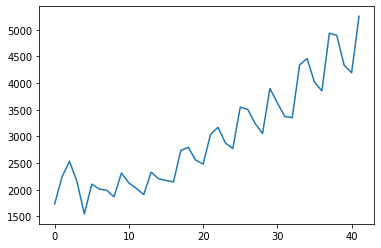

In [18]:
#plot the data
df.Sales.plot()

In [19]:
#splitting the dataset
Train = df.head(n=32)
Test = df.tail(n=10)

In [20]:
Train.head()
Train.tail()
Test.head()
Test.tail()
# to change the index value in pandas data frame 
# Test.set_index(np.arange(1,13))

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,t_cube,t^4,log_sales
37,Q2_95,4936.0,Q2,0,1,0,0,38,1444,54872,2085136,8.504311
38,Q3_95,4895.0,Q3,0,0,1,0,39,1521,59319,2313441,8.495970
39,Q4_95,4333.0,Q4,0,0,0,1,40,1600,64000,2560000,8.374015
40,Q1_96,4194.0,Q1,1,0,0,0,41,1681,68921,2825761,8.341410
41,Q2_96,5253.0,Q2,0,1,0,0,42,1764,74088,3111696,8.566555


In [21]:
Test

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,t_cube,t^4,log_sales
32,Q1_94,3352.0,Q1,1,0,0,0,33,1089,35937,1185921,8.117312
33,Q2_94,4342.0,Q2,0,1,0,0,34,1156,39304,1336336,8.376090
34,Q3_94,4461.0,Q3,0,0,1,0,35,1225,42875,1500625,8.403128
35,Q4_94,4017.0,Q4,0,0,0,1,36,1296,46656,1679616,8.298291
36,Q1_95,3854.0,Q1,1,0,0,0,37,1369,50653,1874161,8.256867
37,Q2_95,4936.0,Q2,0,1,0,0,38,1444,54872,2085136,8.504311
38,Q3_95,4895.0,Q3,0,0,1,0,39,1521,59319,2313441,8.495970
39,Q4_95,4333.0,Q4,0,0,0,1,40,1600,64000,2560000,8.374015
40,Q1_96,4194.0,Q1,1,0,0,0,41,1681,68921,2825761,8.341410
41,Q2_96,5253.0,Q2,0,1,0,0,42,1764,74088,3111696,8.566555


In [22]:
Train

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,t_cube,t^4,log_sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,8,16,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,27,81,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,64,256,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,125,625,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,216,1296,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,343,2401,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,512,4096,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,729,6561,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,1000,10000,7.746574


# ####################### Trend models ##########################

In [23]:
import statsmodels.formula.api as smf

#Linear model
linear_model = smf.ols("Sales~t", data=Train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(Test["t"])))
rmse_linear = np.sqrt(np.mean((np.array(Test["Sales"])-np.array(pred_linear))**2))
rmse_linear

752.9233933232188

In [24]:
linear_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.741   
Dependent Variable: Sales            AIC:                460.5781
Date:               2021-01-08 22:39 BIC:                463.5096
No. Observations:   32               Log-Likelihood:     -228.29 
Df Model:           1                F-statistic:        89.71   
Df Residuals:       30               Prob (F-statistic): 1.59e-10
R-squared:          0.749            Scale:              98197.  
-----------------------------------------------------------------
              Coef.   Std.Err.    t    P>|t|    [0.025    0.975] 
-----------------------------------------------------------------
Intercept   1628.7787 113.4395 14.3581 0.0000 1397.1044 1860.4530
t             56.8275   5.9997  9.4718 0.0000   44.5746   69.0804
-----------------------------------------------------------------
Omnibus:              1.891        Durbin-Watson:           1.343
Prob(Omnibus):        0.389        Jarque-Bera (JB):        1.731
Skew:                 0.519        Prob(JB):                0.421
Kurtosis:             2.531        Condition No.:           39   
=================================================================

"""

In [25]:
#exponential model
exp_model = smf.ols("log_sales~t", data=Train).fit()
pred_exp = pd.Series(exp_model.predict(pd.DataFrame(Test["t"])))
rmse_exp = np.sqrt(np.mean((np.array(Test["Sales"])-np.array(np.exp(pred_exp)))**2))
rmse_exp

590.3316432612867

In [26]:
exp_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.737   
Dependent Variable: log_sales        AIC:                -42.1424
Date:               2021-01-08 22:39 BIC:                -39.2110
No. Observations:   32               Log-Likelihood:     23.071  
Df Model:           1                F-statistic:        87.79   
Df Residuals:       30               Prob (F-statistic): 2.04e-10
R-squared:          0.745            Scale:              0.014768
-------------------------------------------------------------------
            Coef.    Std.Err.      t       P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept   7.4632     0.0440   169.6484   0.0000   7.3734   7.5531
t           0.0218     0.0023     9.3698   0.0000   0.0170   0.0266
-----------------------------------------------------------------
Omnibus:              1.165        Durbin-Watson:           1.506
Prob(Omnibus):        0.558        Jarque-Bera (JB):        0.732
Skew:                 0.370        Prob(JB):                0.693
Kurtosis:             2.971        Condition No.:           39   
=================================================================

"""

In [27]:
#quadratic model
quad_model = smf.ols("Sales~t+t_squared", data=Train).fit()
pred_quad = pd.Series(quad_model.predict(pd.DataFrame(Test[["t", "t_squared"]])))
rmse_quad = np.sqrt(np.mean((np.array(Test["Sales"])-np.array(pred_quad))**2))
rmse_quad

457.73573555935155

In [28]:
quad_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.807   
Dependent Variable: Sales            AIC:                452.0282
Date:               2021-01-08 22:39 BIC:                456.4254
No. Observations:   32               Log-Likelihood:     -223.01 
Df Model:           2                F-statistic:        65.96   
Df Residuals:       29               Prob (F-statistic): 1.62e-11
R-squared:          0.820            Scale:              73053.  
-----------------------------------------------------------------
              Coef.   Std.Err.    t    P>|t|    [0.025    0.975] 
-----------------------------------------------------------------
Intercept   2023.7004 152.7895 13.2450 0.0000 1711.2108 2336.1900
t            -12.8646  21.3457 -0.6027 0.5514  -56.5214   30.7922
t_squared      2.1119   0.6275  3.3653 0.0022    0.8284    3.3953
-----------------------------------------------------------------
Omnibus:              2.222        Durbin-Watson:           1.889
Prob(Omnibus):        0.329        Jarque-Bera (JB):        1.302
Skew:                 0.164        Prob(JB):                0.521
Kurtosis:             2.068        Condition No.:           1534 
=================================================================
* The condition number is large (2e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [29]:
# additive seasonality
seas_add_model = smf.ols("Sales~Q1+Q2+Q3", data=Train).fit()
pred_add_seas = pd.Series(seas_add_model.predict(Test[["Q1", "Q2", "Q3"]]))
rmse_add_seas = np.sqrt(np.mean((np.array(Test["Sales"])-np.array(pred_add_seas))**2))
rmse_add_seas

1850.466546169034

In [30]:
seas_add_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.058     
Dependent Variable: Sales            AIC:                503.6817  
Date:               2021-01-08 22:39 BIC:                509.5447  
No. Observations:   32               Log-Likelihood:     -247.84   
Df Model:           3                F-statistic:        1.641     
Df Residuals:       28               Prob (F-statistic): 0.202     
R-squared:          0.149            Scale:              3.5708e+05
-------------------------------------------------------------------
                Coef.   Std.Err.    t    P>|t|    [0.025    0.975] 
-------------------------------------------------------------------
Intercept     2549.9222 211.2693 12.0695 0.0000 2117.1568 2982.6877
Q1            -359.9782 298.7798 -1.2048 0.2384 -972.0010  252.0445
Q2             227.8279 298.7798  0.7625 0.4521 -384.1949  839.8506
Q3             198.1913 298.7798  0.6633 0.5125 -413.8315  810.2140
-------------------------------------------------------------------
Omnibus:                7.279        Durbin-Watson:           0.097
Prob(Omnibus):          0.026        Jarque-Bera (JB):        3.051
Skew:                   0.464        Prob(JB):                0.218
Kurtosis:               1.805        Condition No.:           5    
===================================================================

"""

In [31]:
#additive seasonality with linear
seas_add_linear = smf.ols("Sales~t+Q1+Q2+Q3", data=Train).fit()
pred_add_linear = pd.Series(seas_add_linear.predict(Test[["t", "Q1", "Q2", "Q3"]]))
rmse_add_linear = np.sqrt(np.mean((np.array(Test["Sales"]) - np.array(pred_add_linear))**2))
rmse_add_linear

673.4432893250384

In [32]:
seas_add_linear.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.850   
Dependent Variable: Sales            AIC:                445.7260
Date:               2021-01-08 22:39 BIC:                453.0547
No. Observations:   32               Log-Likelihood:     -217.86 
Df Model:           4                F-statistic:        44.93   
Df Residuals:       27               Prob (F-statistic): 1.48e-11
R-squared:          0.869            Scale:              56866.  
-----------------------------------------------------------------
              Coef.   Std.Err.    t    P>|t|    [0.025    0.975] 
-----------------------------------------------------------------
Intercept   1539.9386 118.1640 13.0322 0.0000 1297.4860 1782.3912
t             56.1102   4.5995 12.1991 0.0000   46.6728   65.5477
Q1          -191.6476 120.0292 -1.5967 0.1220 -437.9272   54.6320
Q2           340.0483 119.5878  2.8435 0.0084   94.6745  585.4221
Q3           254.3015 119.3221  2.1312 0.0423    9.4727  499.1302
-----------------------------------------------------------------
Omnibus:              2.069        Durbin-Watson:           0.487
Prob(Omnibus):        0.355        Jarque-Bera (JB):        1.379
Skew:                 0.508        Prob(JB):                0.502
Kurtosis:             3.052        Condition No.:           86   
=================================================================

"""

In [33]:
df.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,t_cube,t^4,log_sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,8,16,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,27,81,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,64,256,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,125,625,7.344602


In [34]:
#additive seasonality with quadratic
seas_add_quad = smf.ols("Sales~t+t_squared+Q1+Q2+Q3", data=Train).fit()
pred_add_quad = pd.Series(seas_add_quad.predict(Test[["t", "t_squared", "Q1", "Q2", "Q3"]]))
rmse_add_quad = np.sqrt(np.mean((np.array(Test["Sales"]) - np.array(pred_add_quad))**2))
rmse_add_quad

277.3510771147881

In [35]:
seas_add_quad.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.931   
Dependent Variable: Sales            AIC:                421.7163
Date:               2021-01-08 22:39 BIC:                430.5107
No. Observations:   32               Log-Likelihood:     -204.86 
Df Model:           5                F-statistic:        84.55   
Df Residuals:       26               Prob (F-statistic): 3.09e-15
R-squared:          0.942            Scale:              26197.  
-----------------------------------------------------------------
              Coef.   Std.Err.    t    P>|t|    [0.025    0.975] 
-----------------------------------------------------------------
Intercept   1939.1220 106.3897 18.2266 0.0000 1720.4349 2157.8092
t            -14.7127  12.7891 -1.1504 0.2604  -41.0010   11.5757
t_squared      2.1461   0.3758  5.7105 0.0000    1.3736    2.9187
Q1          -191.6476  81.4674 -2.3524 0.0265 -359.1062  -24.1890
Q2           344.3406  81.1712  4.2422 0.0002  177.4907  511.1905
Q3           258.5938  80.9909  3.1929 0.0037   92.1145  425.0730
-----------------------------------------------------------------
Omnibus:              0.102        Durbin-Watson:           1.090
Prob(Omnibus):        0.950        Jarque-Bera (JB):        0.081
Skew:                 0.082        Prob(JB):                0.960
Kurtosis:             2.817        Condition No.:           2269 
=================================================================
* The condition number is large (2e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [36]:
df.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,t_cube,t^4,log_sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,8,16,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,27,81,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,64,256,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,125,625,7.344602


In [37]:
#additive seasonality with polymomial oder 3
seas_add_poly3 = smf.ols("Sales~t+t_squared+t_cube+Q1+Q2+Q3", data=Train).fit()
pred_add_poly3 = pd.Series(seas_add_poly3.predict(Test[["t", "t_squared", "t_cube", "Q1", "Q2", "Q3"]]))
rmse_add_poly3 = np.sqrt(np.mean((np.array(Test["Sales"]) - np.array(pred_add_poly3))**2))
rmse_add_poly3

868.3068198743856

In [38]:
seas_add_poly3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.952   
Dependent Variable: Sales            AIC:                410.8074
Date:               2021-01-08 22:39 BIC:                421.0675
No. Observations:   32               Log-Likelihood:     -198.40 
Df Model:           6                F-statistic:        103.5   
Df Residuals:       25               Prob (F-statistic): 2.02e-16
R-squared:          0.961            Scale:              18201.  
-----------------------------------------------------------------
              Coef.   Std.Err.    t    P>|t|    [0.025    0.975] 
-----------------------------------------------------------------
Intercept   2236.9971 122.5005 18.2611 0.0000 1984.7025 2489.2917
t           -107.1902  28.3206 -3.7849 0.0009 -165.5177  -48.8628
t_squared      9.0298   1.9780  4.5651 0.0001    4.9560   13.1036
t_cube        -0.1391   0.0395 -3.5246 0.0017   -0.2203   -0.0578
Q1          -234.4098  68.9805 -3.3982 0.0023 -376.4777  -92.3419
Q2           315.9715  68.1354  4.6374 0.0001  175.6441  456.2989
Q3           244.2006  67.6314  3.6108 0.0013  104.9111  383.4901
-----------------------------------------------------------------
Omnibus:              1.678        Durbin-Watson:           1.562
Prob(Omnibus):        0.432        Jarque-Bera (JB):        1.351
Skew:                 0.492        Prob(JB):                0.509
Kurtosis:             2.791        Condition No.:           75189
=================================================================
* The condition number is large (8e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

In [39]:
#### additive seasonality with exponential trend
add_seas_expo_model = smf.ols("log_sales~t+Q1+Q2+Q3", data=Train).fit()
add_seas_expo_pred = pd.Series(add_seas_expo_model.predict(pd.DataFrame(Test[["t", "Q1", "Q2", "Q3"]])))
rmse_add_seas_expo = np.sqrt(np.mean((np.array(Test["Sales"])-np.array(np.exp(add_seas_expo_pred)))**2))
rmse_add_seas_expo


448.8678183709463

In [40]:
add_seas_expo_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.861    
Dependent Variable: log_sales        AIC:                -59.8276 
Date:               2021-01-08 22:39 BIC:                -52.4989 
No. Observations:   32               Log-Likelihood:     34.914   
Df Model:           4                F-statistic:        48.81    
Df Residuals:       27               Prob (F-statistic): 5.63e-12 
R-squared:          0.879            Scale:              0.0078277
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept      7.4379    0.0438  169.6587  0.0000   7.3479   7.5278
t              0.0214    0.0017   12.5631  0.0000   0.0179   0.0249
Q1            -0.0929    0.0445   -2.0860  0.0466  -0.1843  -0.0015
Q2             0.1250    0.0444    2.8166  0.0090   0.0339   0.2160
Q3             0.0932    0.0443    2.1049  0.0447   0.0023   0.1840
------------------------------------------------------------------
Omnibus:               4.848        Durbin-Watson:           0.627
Prob(Omnibus):         0.089        Jarque-Bera (JB):        3.252
Skew:                  0.654        Prob(JB):                0.197
Kurtosis:              3.852        Condition No.:           86   
==================================================================

"""

In [41]:
################## Multiplicative Seasonality ##################

Mul_sea = smf.ols('log_sales~Q1+Q2+Q3',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1908.2503948174244

In [42]:
Mul_sea.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.079   
Dependent Variable: log_sales        AIC:                -0.2722 
Date:               2021-01-08 22:39 BIC:                5.5908  
No. Observations:   32               Log-Likelihood:     4.1361  
Df Model:           3                F-statistic:        1.889   
Df Residuals:       28               Prob (F-statistic): 0.154   
R-squared:          0.168            Scale:              0.051671
------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
------------------------------------------------------------------
Intercept       7.8238    0.0804  97.3502  0.0000   7.6592  7.9884
Q1             -0.1572    0.1137  -1.3832  0.1775  -0.3900  0.0756
Q2              0.0821    0.1137   0.7223  0.4761  -0.1507  0.3149
Q3              0.0717    0.1137   0.6312  0.5330  -0.1611  0.3046
-----------------------------------------------------------------
Omnibus:               10.897       Durbin-Watson:          0.116
Prob(Omnibus):         0.004        Jarque-Bera (JB):       2.853
Skew:                  0.281        Prob(JB):               0.240
Kurtosis:              1.649        Condition No.:          5    
=================================================================

"""

In [43]:
##################Multiplicative Seasonality with Linear Trend###########

Mul_Add_sea_linear = smf.ols('log_sales~t+Q1+Q2+Q3',data = Train).fit()
pred_Mult_add_sea_linear = pd.Series(Mul_Add_sea_linear.predict(Test))
rmse_Mult_add_sea_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea_linear)))**2))
rmse_Mult_add_sea_linear 


448.8678183709463

In [44]:
Mul_Add_sea_linear.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.861    
Dependent Variable: log_sales        AIC:                -59.8276 
Date:               2021-01-08 22:39 BIC:                -52.4989 
No. Observations:   32               Log-Likelihood:     34.914   
Df Model:           4                F-statistic:        48.81    
Df Residuals:       27               Prob (F-statistic): 5.63e-12 
R-squared:          0.879            Scale:              0.0078277
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept      7.4379    0.0438  169.6587  0.0000   7.3479   7.5278
t              0.0214    0.0017   12.5631  0.0000   0.0179   0.0249
Q1            -0.0929    0.0445   -2.0860  0.0466  -0.1843  -0.0015
Q2             0.1250    0.0444    2.8166  0.0090   0.0339   0.2160
Q3             0.0932    0.0443    2.1049  0.0447   0.0023   0.1840
------------------------------------------------------------------
Omnibus:               4.848        Durbin-Watson:           0.627
Prob(Omnibus):         0.089        Jarque-Bera (JB):        3.252
Skew:                  0.654        Prob(JB):                0.197
Kurtosis:              3.852        Condition No.:           86   
==================================================================

"""

In [45]:
##################Multiplicative Seasonality with Quad Trend###########

Mul_Add_sea_quad = smf.ols('log_sales~t+t_squared+Q1+Q2+Q3',data = Train).fit()
pred_Mult_add_sea_quad = pd.Series(Mul_Add_sea_quad.predict(Test))
rmse_Mult_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea_quad)))**2))
rmse_Mult_add_sea_quad 

801.9777858139327

In [46]:
Mul_Add_sea_quad.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.910    
Dependent Variable: log_sales        AIC:                -73.0117 
Date:               2021-01-08 22:39 BIC:                -64.2173 
No. Observations:   32               Log-Likelihood:     42.506   
Df Model:           5                F-statistic:        63.59    
Df Residuals:       26               Prob (F-statistic): 9.54e-14 
R-squared:          0.924            Scale:              0.0050576
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept      7.5599    0.0467  161.7220  0.0000   7.4638   7.6560
t             -0.0002    0.0056   -0.0380  0.9699  -0.0118   0.0113
t_squared      0.0007    0.0002    3.9734  0.0005   0.0003   0.0010
Q1            -0.0929    0.0358   -2.5951  0.0153  -0.1665  -0.0193
Q2             0.1263    0.0357    3.5406  0.0015   0.0530   0.1996
Q3             0.0945    0.0356    2.6553  0.0133   0.0213   0.1676
------------------------------------------------------------------
Omnibus:               1.376        Durbin-Watson:           1.010
Prob(Omnibus):         0.503        Jarque-Bera (JB):        0.462
Skew:                  0.172        Prob(JB):                0.794
Kurtosis:              3.477        Condition No.:           2269 
==================================================================
* The condition number is large (2e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [47]:
##################Multiplicative Seasonality with Poly degree3 Trend###########

Mul_Add_sea_poly3 = smf.ols('log_sales~t+t_squared+t_cube+Q1+Q2+Q3',data = Train).fit()
pred_Mult_add_sea_poly3 = pd.Series(Mul_Add_sea_poly3.predict(Test))
rmse_Mult_add_sea_poly3 = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea_poly3)))**2))
rmse_Mult_add_sea_poly3 

1262.7637461099573

In [48]:
Mul_Add_sea_poly3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.942    
Dependent Variable: log_sales        AIC:                -86.2351 
Date:               2021-01-08 22:39 BIC:                -75.9749 
No. Observations:   32               Log-Likelihood:     50.118   
Df Model:           6                F-statistic:        84.53    
Df Residuals:       25               Prob (F-statistic): 2.24e-15 
R-squared:          0.953            Scale:              0.0032687
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept      7.6997    0.0519  148.3174  0.0000   7.5928   7.8066
t             -0.0436    0.0120   -3.6333  0.0013  -0.0683  -0.0189
t_squared      0.0039    0.0008    4.6360  0.0001   0.0022   0.0056
t_cube        -0.0001    0.0000   -3.9025  0.0006  -0.0001  -0.0000
Q1            -0.1130    0.0292   -3.8641  0.0007  -0.1732  -0.0528
Q2             0.1130    0.0289    3.9123  0.0006   0.0535   0.1724
Q3             0.0877    0.0287    3.0613  0.0052   0.0287   0.1468
------------------------------------------------------------------
Omnibus:               3.926        Durbin-Watson:           1.606
Prob(Omnibus):         0.140        Jarque-Bera (JB):        2.681
Skew:                  0.364        Prob(JB):                0.262
Kurtosis:              4.216        Condition No.:           75189
==================================================================
* The condition number is large (8e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

In [49]:
################## Testing #######################################

data = {"Model":pd.Series(["rmse_linear", "rmse_exp", "rmse_quad","rmse_add_seas", "rmse_add_linear", "rmse_add_quad", "rmse_add_poly3", "rmse_add_seas_expo", "rmse_Mult_add_sea_linear", "rmse_Mult_add_sea_quad", "rmse_Mult_add_sea_poly3"]), "RMSE values":pd.Series([rmse_linear, rmse_exp, rmse_quad,rmse_add_seas, rmse_add_linear, rmse_add_quad, rmse_add_poly3, rmse_add_seas_expo, rmse_Mult_add_sea_linear, rmse_Mult_add_sea_quad, rmse_Mult_add_sea_poly3])}
table_rmse = pd.DataFrame(data)
table_rmse

,Model,RMSE values
0,rmse_linear,752.923393
1,rmse_exp,590.331643
2,rmse_quad,457.735736
3,rmse_add_seas,1850.466546
4,rmse_add_linear,673.443289
5,rmse_add_quad,277.351077
6,rmse_add_poly3,868.306820
7,rmse_add_seas_expo,448.867818
8,rmse_Mult_add_sea_linear,448.867818
9,rmse_Mult_add_sea_quad,801.977786


In [50]:
# so rmse_add_quad has the least value among the models prepared so far 
# Predicting new values 

predict_data = pd.read_csv("C:/Users/archa/Documents/Sem3 files/Predict_data.csv")
model_full = smf.ols('Sales~t+t_squared+Q1+Q2+Q3',data=df).fit()


In [51]:
pred_new  = pd.Series(seas_add_quad.predict(predict_data))
pred_new

0     3665.971866
1     3599.111165
2     4264.178607
3     4311.803302
4     4190.873370
5     4141.181850
6     4823.418475
7     4888.212351
8     4784.451601
9     4751.929264
10    5451.335070
dtype: float64

In [52]:
predict_data["forecasted_Sales"] = pd.Series(pred_new)
predict_data

,Unnamed: 0,ï..Quarter,Sales,t,log_sales,t_squared,t_cube,t^4,t^5,Q1,Q2,Q3,Q4,forecasted_Sales
0,32,Q4_93,3373,32,8.123558,1024,32768,1048576,33554432,0,0,0,1,3665.971866
1,33,Q1_94,3352,33,8.117312,1089,35937,1185921,39135393,1,0,0,0,3599.111165
2,34,Q2_94,4342,34,8.376090,1156,39304,1336336,45435424,0,1,0,0,4264.178607
3,35,Q3_94,4461,35,8.403128,1225,42875,1500625,52521875,0,0,1,0,4311.803302
4,36,Q4_94,4017,36,8.298291,1296,46656,1679616,60466176,0,0,0,1,4190.873370
5,37,Q1_95,3854,37,8.256867,1369,50653,1874161,69343957,1,0,0,0,4141.181850
6,38,Q2_95,4936,38,8.504311,1444,54872,2085136,79235168,0,1,0,0,4823.418475
7,39,Q3_95,4895,39,8.495970,1521,59319,2313441,90224199,0,0,1,0,4888.212351
8,40,Q4_95,4333,40,8.374015,1600,64000,2560000,102400000,0,0,0,1,4784.451601
9,41,Q1_96,4194,41,8.341410,1681,68921,2825761,115856201,1,0,0,0,4751.929264


In [53]:
%clear
%reset


Once deleted, variables cannot be recovered. Proceed (y/[n])? 
Nothing done.


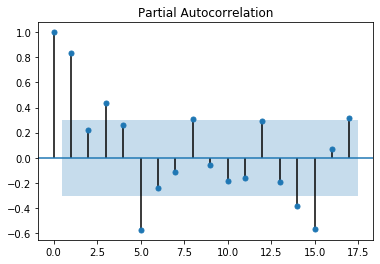

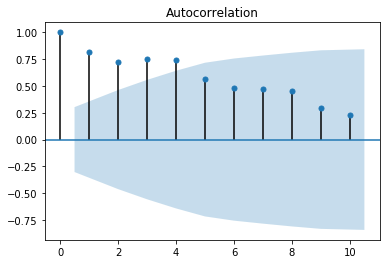

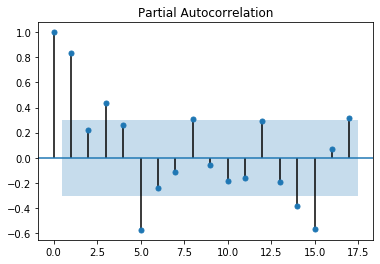

In [54]:
import statsmodels.graphics.tsaplots as tsa_plots
# ACF plots and PACF plots on Original data sets 
tsa_plots.plot_acf(cocacola.Sales,lags=10)
tsa_plots.plot_pacf(cocacola.Sales)

In [55]:
import statsmodels.api as sm

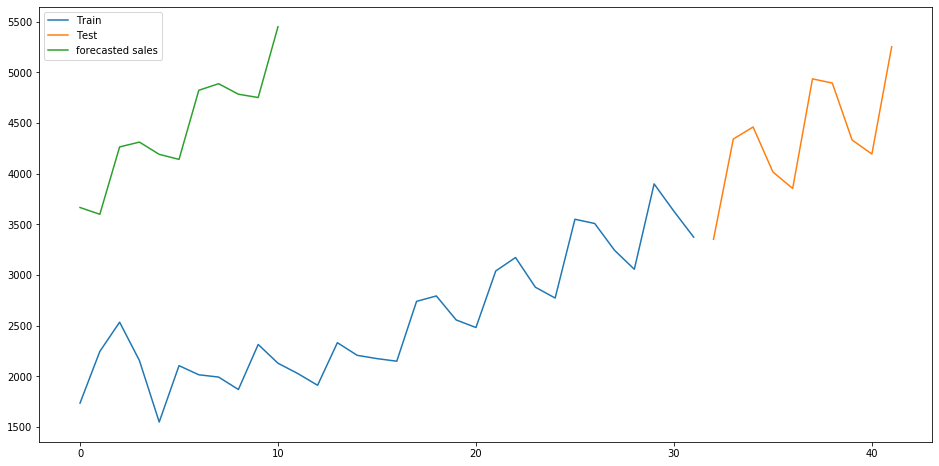

In [56]:
plt.figure(figsize=(16,8))
plt.plot( Train['Sales'], label='Train')
plt.plot(Test['Sales'], label='Test')
plt.plot(predict_data['forecasted_Sales'], label='forecasted sales')
plt.legend(loc='best')

In [57]:
from   statsmodels.tsa.stattools  import  adfuller
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA

In [58]:
import statsmodels.tsa.statespace as tm_models
from statsmodels.tsa.seasonal import seasonal_decompose


C:\Users\archa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


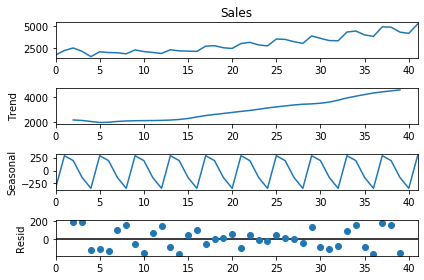

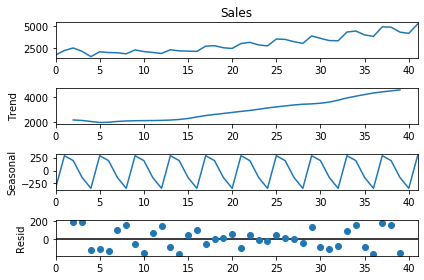

In [59]:
decompose_ts_add = seasonal_decompose(df.Sales,model="additive",freq=4)
decompose_ts_add.plot()



C:\Users\archa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


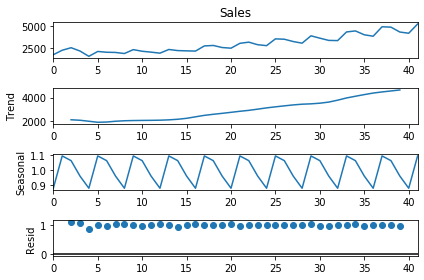

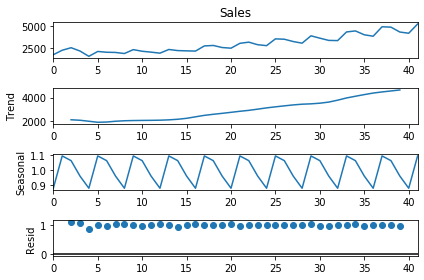

In [60]:
decompose_ts_mul = seasonal_decompose(df.Sales,model="multiplicative",freq=4)
decompose_ts_mul.plot()

In [61]:
# 1,0,0 ARIMA Model
model = ARIMA(df.Sales, order=(1,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                   42
Model:                     ARMA(1, 0)   Log Likelihood                -315.765
Method:                       css-mle   S.D. of innovations            434.562
Date:                Fri, 08 Jan 2021   AIC                            637.530
Time:                        22:39:35   BIC                            642.743
Sample:                             0   HQIC                           639.441
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3199.4170    817.115      3.916      0.000    1597.902    4800.932
ar.L1.Sales     0.9364      0.058     16.172      0.000       0.823       1.050
                                    Roots       

In [62]:
# 1,0,1 ARIMA Model, since the PACF and ACF plots are significant.
model1 = ARIMA(df.Sales, order=(1,0,1))
model1_fit = model1.fit(disp=0)
print(model1_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                   42
Model:                     ARMA(1, 1)   Log Likelihood                -313.363
Method:                       css-mle   S.D. of innovations            407.950
Date:                Fri, 08 Jan 2021   AIC                            634.726
Time:                        22:39:36   BIC                            641.677
Sample:                             0   HQIC                           637.274
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3313.0236   1140.034      2.906      0.004    1078.599    5547.448
ar.L1.Sales     0.9877      0.017     58.737      0.000       0.955       1.021
ma.L1.Sales    -0.5156      0.118     -4.379    

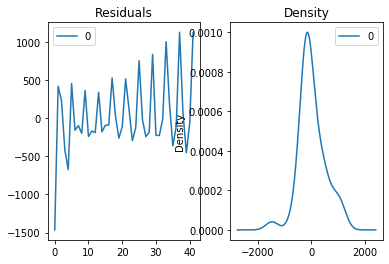

In [63]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

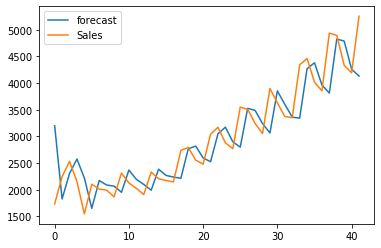

In [64]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [65]:
# Build Model
# model = ARIMA(train, order=(1,0,1))  
model2 = ARIMA(Train.Sales, order=(1, 0, 1))  
fitted = model2.fit(disp=-1) 




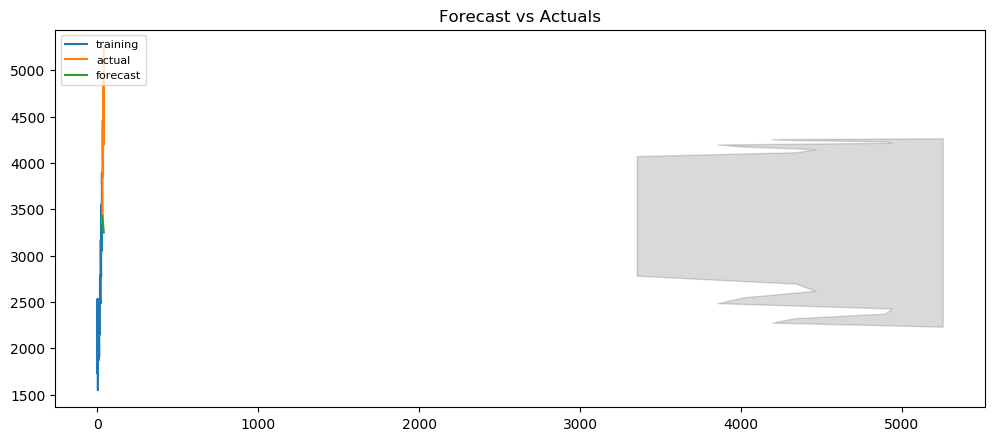

In [66]:
# Forecast
fc, se, conf = fitted.forecast(10, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=Test.index)
lower_series = pd.Series(conf[:, 0], index=Test.Sales)
upper_series = pd.Series(conf[:, 1], index=Test.Sales)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Train.Sales, label='training')
plt.plot(Test.Sales, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()